<h1>Lab | Feature extraction</h1><br>

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

<h2>Instructions</h2><br>

- 1. Open the categoricals variable we created before.
            categoricals = data.select_dtypes(np.object)
            categoricals.head()
- 2. Plot all the categorical variables with the proper plot. What can you see?
- 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
- 4. Plot time variable. Can you extract something from it?

**Copy paste from previous LAB**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
customer_df = pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")

In [4]:
customer_df.columns = customer_df.columns.str.lower().str.replace(' ','_')

In [5]:
# Convert dates in datetime format

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

# Transform the column into a column that gives us only the month and the year

customer_df['effective_to_date'] = customer_df['effective_to_date'].apply(lambda x: x.strftime('%B-%Y'))

In [6]:
customer_df.drop(["customer"], axis=1, inplace = True)

**Here starts this LAB | Feature extraction**

**1. Open the categoricals variable we created before.**

In [8]:
categoricals = customer_df.select_dtypes(np.object)
categoricals.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,February-2011,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,January-2011,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,February-2011,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,January-2011,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,February-2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


**2. Plot all the categorical variables with the proper plot. What can you see?**


 state


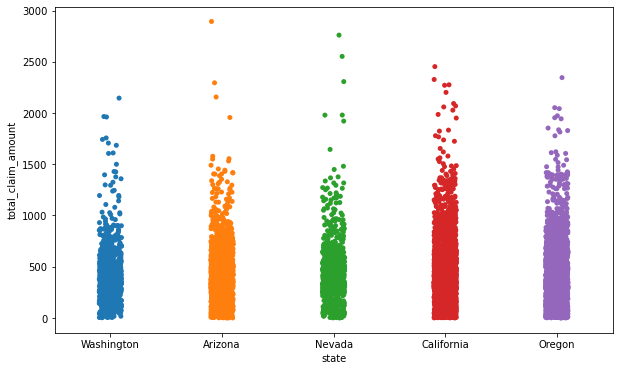


 response


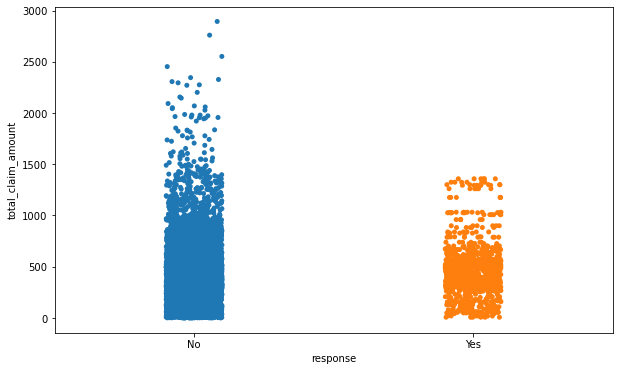


 coverage


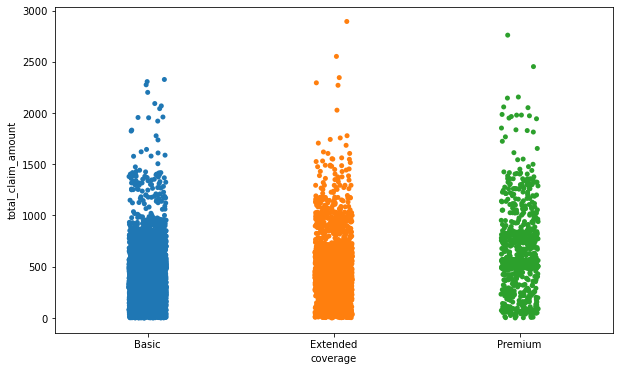


 education


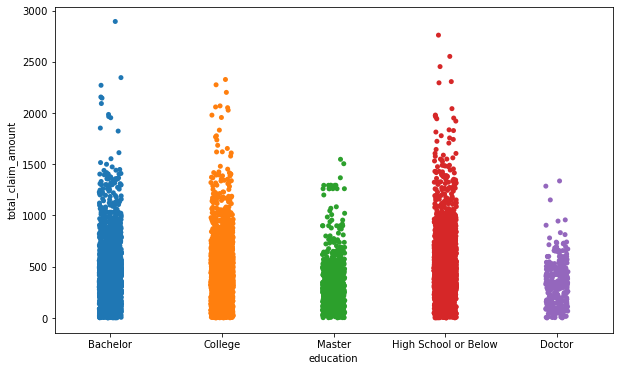


 effective_to_date


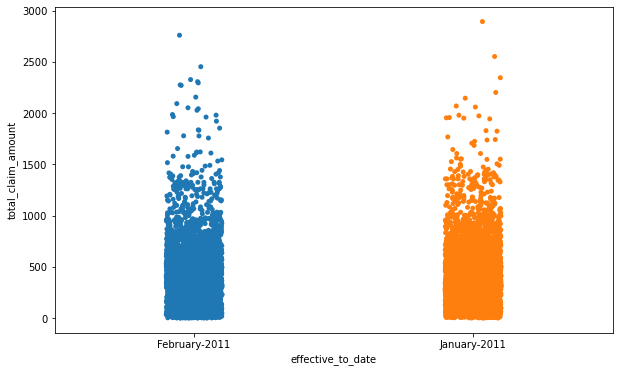


 employmentstatus


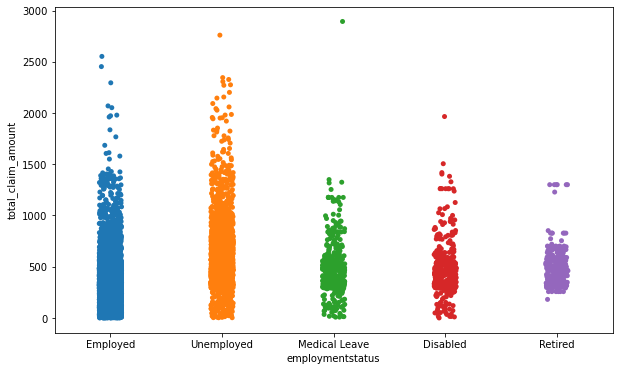


 gender


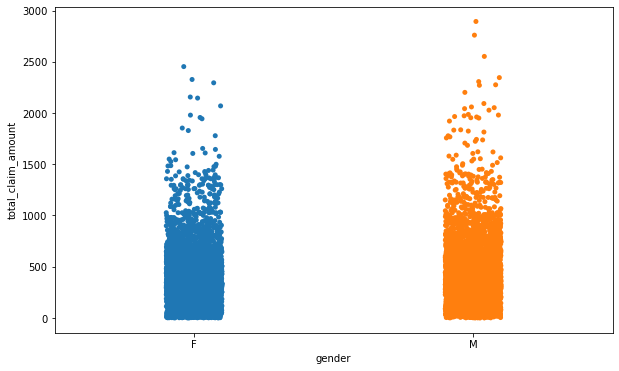


 location_code


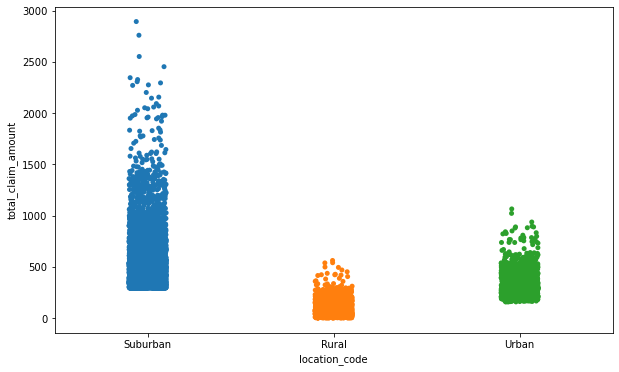


 marital_status


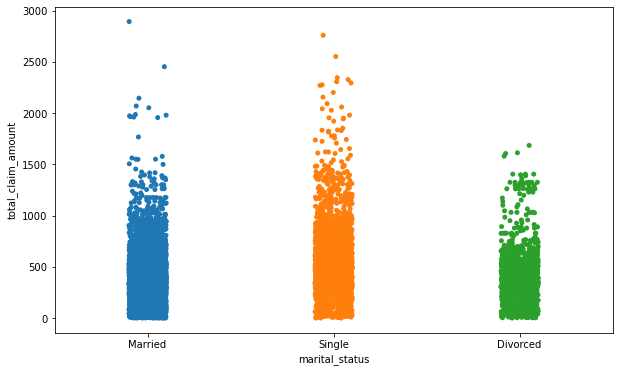


 policy_type


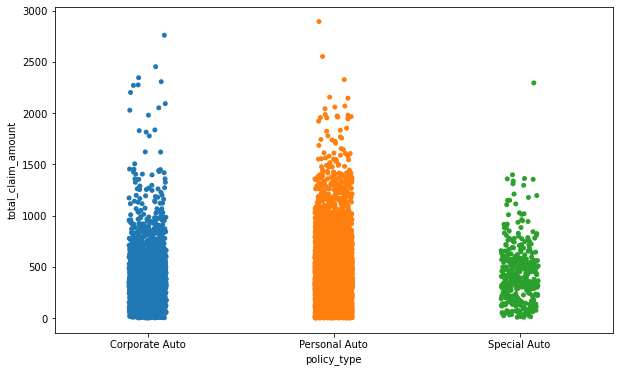


 policy


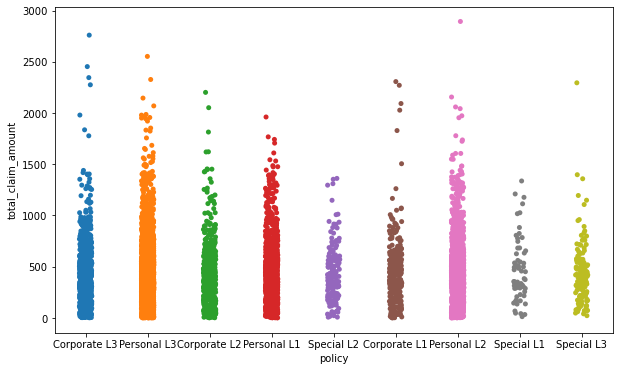


 renew_offer_type


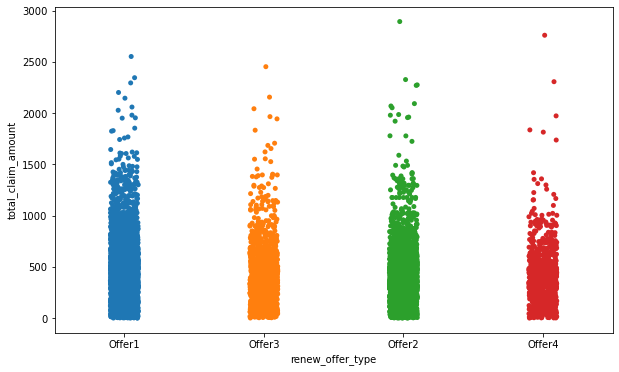


 sales_channel


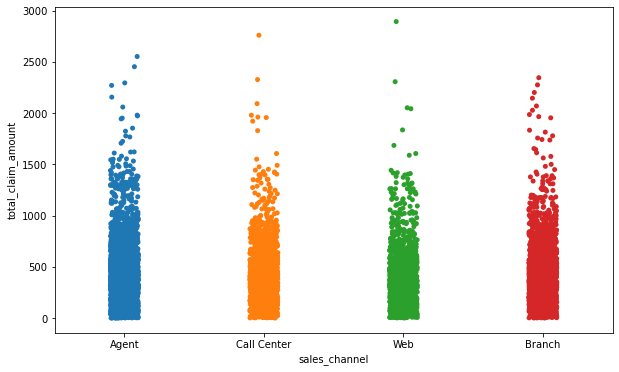


 vehicle_class


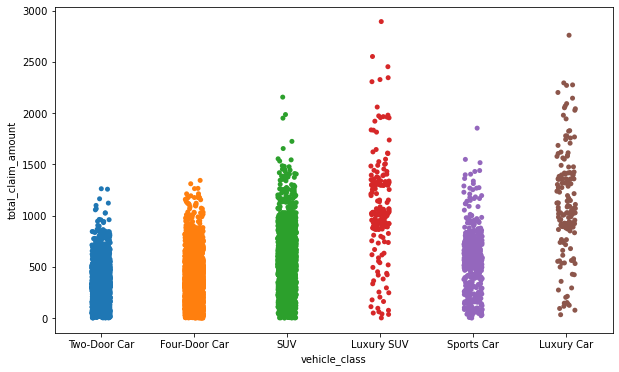


 vehicle_size


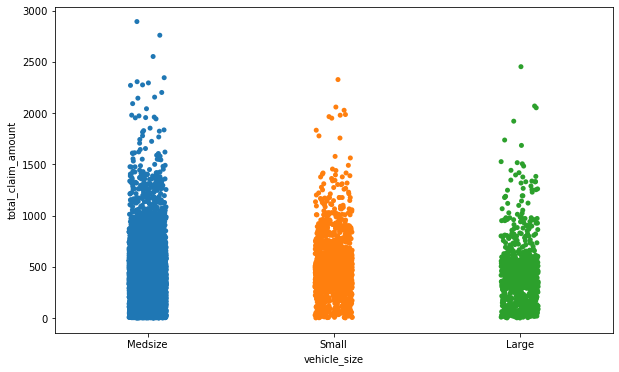

In [11]:
for features in categoricals:
    plt.figure(figsize=(10,6))
    sns.stripplot(x =features, y =customer_df['total_claim_amount'], data = customer_df, jitter = True, dodge = True)
    print()
    print('\033[1m',features)
    plt.show()

>I can see the same as the previous LAB, so I'm going to copy paste it

#### CONCLUSION:
- Broadly speaking, we can't see a huge difference between the categories of each feature except for people who lives in suburban areas or clients who have low or medium education level.
- Customers who have special policies tend to reclaim less but probably because we don't have as much amount of this kind of policies.
- It seems that luxury car drivers ara more likely to reclaim a bigger amount.

**3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?**

>This is not the case, but if we see redundant infromation we should get the most important one and delete the other

**4. Plot time variable. Can you extract something from it?**

>As we see just a bit above, on the plot for the "effective_to_date" feature, we see 2 results, for January and February that are really similar